# COURSE: A deep understanding of deep learning
## SECTION: Running models on a GPU
### LECTURE: Implementation
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [15]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [ ]:
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [16]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [17]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [18]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [19]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [20]:
data

tensor([[-0.7105,  0.9395, -0.7420,  ...,  0.9323,  0.2986,  0.2592],
        [-1.3060,  0.7786, -1.3390,  ...,  0.3101, -0.5040, -0.7248],
        [-1.3081,  1.1445,  1.4116,  ..., -0.4237,  0.1899, -2.2030],
        ...,
        [-0.2841, -0.6400,  0.2373,  ...,  0.2019, -1.2027, -0.2868],
        [ 0.2961,  1.5739,  0.1549,  ...,  0.6544,  0.6586,  0.9853],
        [ 0.6603,  0.4836, -0.2544,  ...,  0.1351, -0.5715, -0.2495]],
       device='cuda:0')

In [21]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [22]:
output = net(data)

In [23]:
output.device

device(type='cuda', index=0)

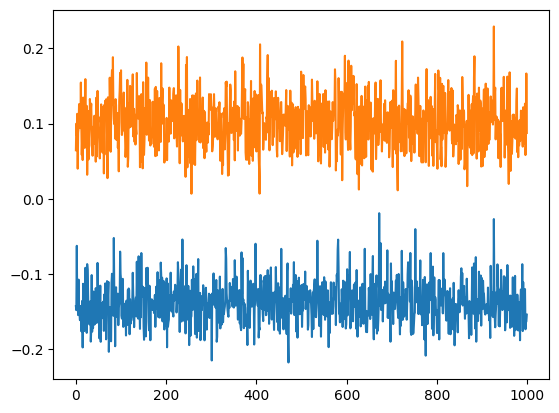

In [24]:
# try to plot the data
#plt.plot(output.detach());

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [25]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [26]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [27]:
# time in ms
[CPUtime,GPUtime]

[8.417559999999824, 2.8461069999998756]

In [ ]:
# but maybe "sending" it to the CPU takes too much overhead?

In [28]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[3.534247000000157, 8.417559999999824, 2.8461069999998756]